In [1]:
import numpy as np
from scipy.special import erf
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import math
from scipy.special import erf
plt.rcParams["figure.figsize"] = (10,8)

# Test Case

In [4]:
Same_eps128_Nx_128 = np.load('Same_N128_eps128.npz')['h_num']
Same_eps128_Nx_256 = np.load('Same_N256_eps128.npz')['h_num']
Same_eps128_Nx_512 = np.load('Same_N512_eps128.npz')['h_num']
Same_eps128_Nx_1024 = np.load('Same_N1024_eps128.npz')['h_num']

In [6]:
def lam(x):
    return np.sqrt(np.pi) * x * np.exp(x**2) * erf(x) - 1
lambd = fsolve(lam, 0.8)

h = 0.1
t0 = (h / (2 * lambd))**2  # Initial t0
t_end = 0.1 

In [8]:
t = np.linspace(t0, t_end+t0, len(Same_eps128_Nx_128))
h_a = 2*np.sqrt(t)*lambd

In [10]:
L2_Same_Nx_128 = np.linalg.norm(h_a.flatten() - Same_eps128_Nx_128)
L2_Same_Nx_256 = np.linalg.norm(h_a.flatten() - Same_eps128_Nx_256)
L2_Same_Nx_512 = np.linalg.norm(h_a.flatten() - Same_eps128_Nx_512)
L2_Same_Nx_1024 = np.linalg.norm(h_a.flatten() - Same_eps128_Nx_1024)

L2_Same_Nx_1024

0.000996379216487369

<Figure size 800x600 with 0 Axes>

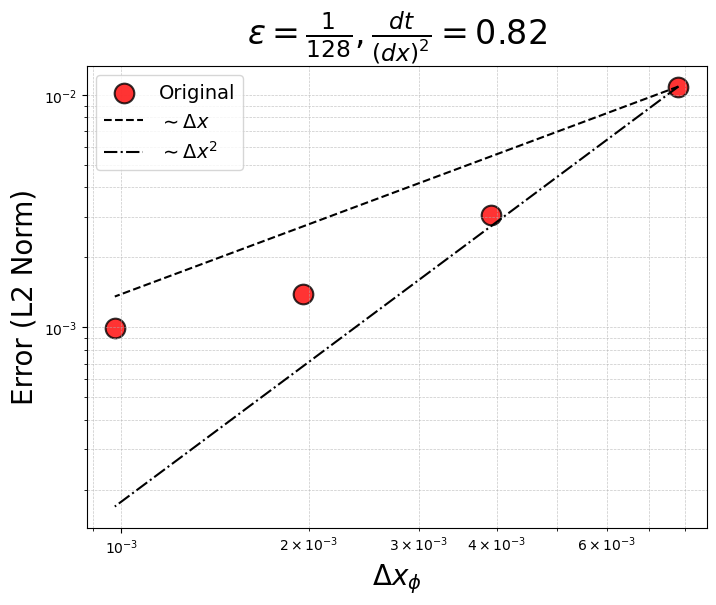

In [12]:
plt.figure(figsize=(8, 6))

L2_Same = [L2_Same_Nx_128, L2_Same_Nx_256, L2_Same_Nx_512,  L2_Same_Nx_1024]

xvalues = np.array([(1/128), (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_Same[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \frac{dt}{(dx)^2} = 0.82 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_Same[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_Same[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Changing dx_phi and dt Keeping everyting else constant

In [15]:
phimew_eps128_Nx_128 = np.load('phimew_N128_eps128.npz')['h_num']
phimew_eps128_Nx_256 = np.load('phimew_N256_eps128.npz')['h_num']
phimew_eps128_Nx_512 = np.load('phimew_N512_eps128.npz')['h_num']
phimew_eps128_Nx_1024 = np.load('phimew_N1024_eps128.npz')['h_num']

In [17]:
L2_phimew_Nx_128 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_128)
L2_phimew_Nx_256 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_256)
L2_phimew_Nx_512 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_512)
L2_phimew_Nx_1024 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_1024)

<Figure size 800x600 with 0 Axes>

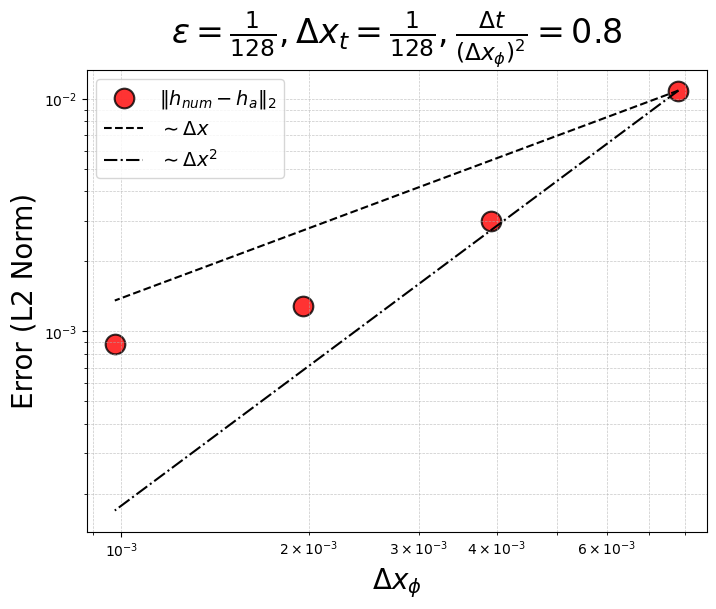

In [19]:
plt.figure(figsize=(8, 6))

L2_phimew = [L2_phimew_Nx_128, L2_phimew_Nx_256, L2_phimew_Nx_512,  L2_phimew_Nx_1024]

xvalues = np.array([(1/128), (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_phimew[:], s=200, color='red',  label=r'$\| h_{num} - h_{a} \|_2$', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_t = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_phimew[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_phimew[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

#plt.savefig("MultRes_dxphi.png", format="png")

# Changing dx_phi Keeping everyting else constant

In [22]:
Tmew_eps128_Nx_128 = np.load('Tmew_N128_eps128.npz')['h_num']
Tmew_eps128_Nx_256 = np.load('Tmew_N256_eps128.npz')['h_num']
Tmew_eps128_Nx_512 = np.load('Tmew_N512_eps128.npz')['h_num']
Tmew_eps128_Nx_1024 = np.load('Tmew_N1024_eps128.npz')['h_num']

Tmew_eps128_Nx_181 = np.load('Tmew_N181_eps128.npz')['h_num']
Tmew_eps128_Nx_362 = np.load('Tmew_N362_eps128.npz')['h_num']
Tmew_eps128_Nx_724 = np.load('Tmew_N724_eps128.npz')['h_num']

Tmew_eps128_Nx_152 = np.load('Tmew_N152_eps128.npz')['h_num']
Tmew_eps128_Nx_215 = np.load('Tmew_N215_eps128.npz')['h_num']
Tmew_eps128_Nx_304 = np.load('Tmew_N304_eps128.npz')['h_num']
Tmew_eps128_Nx_430 = np.load('Tmew_N430_eps128.npz')['h_num']
Tmew_eps128_Nx_608 = np.load('Tmew_N608_eps128.npz')['h_num']
Tmew_eps128_Nx_861 = np.load('Tmew_N861_eps128.npz')['h_num']

In [24]:
L2_Tmew_Nx_128 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_128)
L2_Tmew_Nx_256 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_256)
L2_Tmew_Nx_512 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_512)
L2_Tmew_Nx_1024 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_1024)

L2_Tmew_Nx_181 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_181)
L2_Tmew_Nx_362 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_362)
L2_Tmew_Nx_724 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_724)

L2_Tmew_Nx_152 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_152)
L2_Tmew_Nx_215 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_215)
L2_Tmew_Nx_304 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_304)
L2_Tmew_Nx_430 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_430)
L2_Tmew_Nx_608 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_608)
L2_Tmew_Nx_861 = np.linalg.norm(h_a.flatten() - Tmew_eps128_Nx_861)

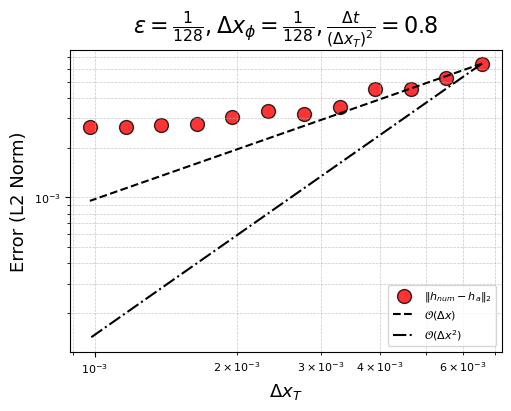

In [26]:
plt.figure(figsize=(5, 4), layout='constrained')

L2_Tmew = [L2_Tmew_Nx_152, L2_Tmew_Nx_181, L2_Tmew_Nx_215, L2_Tmew_Nx_256,  L2_Tmew_Nx_304, L2_Tmew_Nx_362, L2_Tmew_Nx_430, \
           L2_Tmew_Nx_512, L2_Tmew_Nx_608, L2_Tmew_Nx_724, L2_Tmew_Nx_861, L2_Tmew_Nx_1024]

xvalues = np.array([(1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512), (1/608), (1/724), (1/861), (1/1024)])

plt.scatter(xvalues[:],L2_Tmew[:], s=100, color='red',  label=r'$\| h_{num} - h_{a} \|_2$', edgecolors='black', linewidth=1, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_{\phi} = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_T)^2} = 0.8 $', fontsize=16)
plt.xlabel(r'$\Delta x_T$', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize =13)

C1 = L2_Tmew[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_Tmew[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\mathcal{O}(\Delta x)$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\mathcal{O}(\Delta x^2)$') # Second-order convergence

plt.legend(loc='lower right', fontsize=8)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig("MultRes_dxT.pdf", format="pdf")

# Cubic Interpolation

# Changing dx_phi and dt ,let eps = dx_phi, dx_T constant

In [31]:
phimew_eps_dxphi_Nx_128 = np.load('phimew_N128_eps_dxphi.npz')['h_num']
phimew_eps_dxphi_Nx_256 = np.load('phimew_N256_eps_dxphi.npz')['h_num']
phimew_eps_dxphi_Nx_512 = np.load('phimew_N512_eps_dxphi.npz')['h_num']
phimew_eps_dxphi_Nx_1024 = np.load('phimew_N1024_eps_dxphi2.npz')['h_num']

In [33]:
L2_eps_dxphi_Nx_128 = np.linalg.norm(h_a.flatten() - phimew_eps_dxphi_Nx_128)
L2_eps_dxphi_Nx_256 = np.linalg.norm(h_a.flatten() - phimew_eps_dxphi_Nx_256)
L2_eps_dxphi_Nx_512 = np.linalg.norm(h_a.flatten() - phimew_eps_dxphi_Nx_512)
L2_eps_dxphi_Nx_1024 = np.linalg.norm(h_a.flatten() - phimew_eps_dxphi_Nx_1024)

<Figure size 800x600 with 0 Axes>

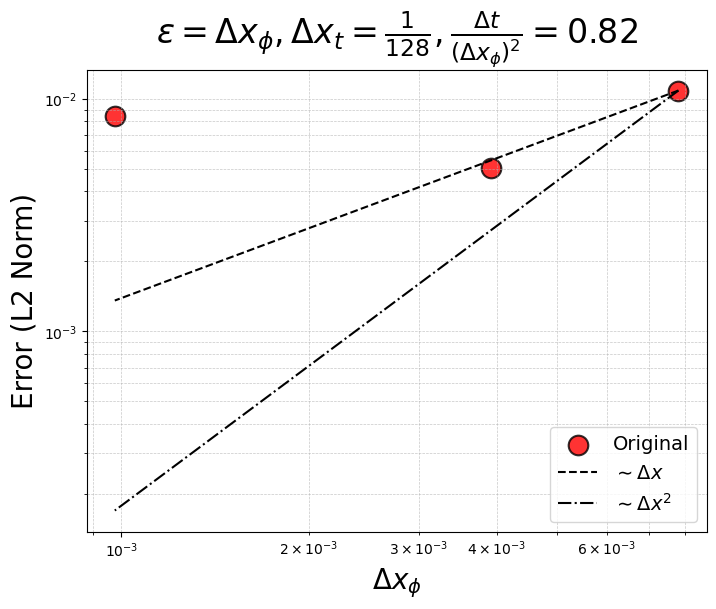

In [35]:
plt.figure(figsize=(8, 6))

L2_eps_dxphi = [L2_eps_dxphi_Nx_128, L2_eps_dxphi_Nx_256 , L2_eps_dxphi_Nx_512, L2_eps_dxphi_Nx_1024]

xvalues = np.array([(1/128), (1/256),  (1/512), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:],L2_eps_dxphi[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \Delta x_{\phi}, \Delta x_t = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.82 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_eps_dxphi[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_eps_dxphi[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Changing A to A_stability

<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
<>:27: SyntaxWarning: invalid escape sequence '\D'
<>:28: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77419/1321839015.py:27: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Stability Limit: Maximum $\Delta t$ for each $\epsilon^{*}$", fontsize=24)
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77419/1321839015.py:28: SyntaxWarning: invalid escape sequence '\D'
  plt.ylabel('Max $\Delta t$', fontsize=20)


Text(0.5, 0, '$\\epsilon^{*}$')

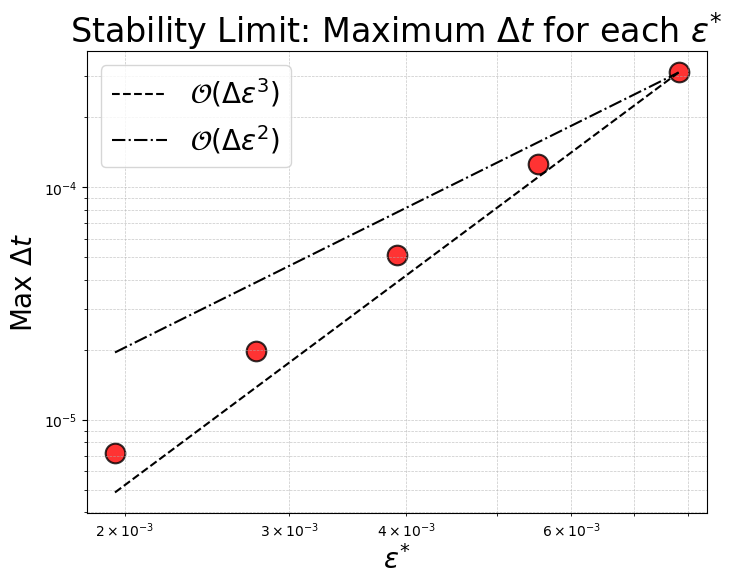

In [38]:
maxdt = np.array([1.2e-6, 3.3e-6, 8.5e-6, 2.1e-5, 5.2e-5])
maxdt = 6*maxdt
eps = np.array([(1/512), (1/362), (1/256), (1/181), (1/128)])

plt.figure(figsize=(8, 6))
plt.scatter(eps, maxdt, s=200, color='red', edgecolors='black', linewidth=1.5, alpha=0.8)

plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# ---- Add Reference Error Lines ----
C1 = maxdt[-1] / (eps[-1]**3)  # Scaling factor for ∼ ε
C2 = maxdt[-1] / (eps[-1]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 *eps**3    # ∼ ε reference line
eps_2 = C2 *eps**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(eps, eps_1, 'k--', label=r'$\mathcal{O}(\Delta \epsilon^{3})$')   # First-order convergence
plt.loglog(eps, eps_2, 'k-.', label=r'$\mathcal{O}(\Delta \epsilon^{2})$') # Second-order convergence



plt.legend(fontsize=20)


plt.title("Stability Limit: Maximum $\Delta t$ for each $\epsilon^{*}$", fontsize=24)
plt.ylabel('Max $\Delta t$', fontsize=20)
plt.xlabel(r'$\epsilon^{*}$', fontsize = 20)


#plt.savefig("eps_stability.png", format="png")

# Changing dx_phi and dt ,let eps = dx_phi, dx_T max value (shown above)

In [41]:
maxdt_eps_dxphi_Nx_128 = np.load('N128_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_181 = np.load('N181_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_256 = np.load('N256_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_362 = np.load('N362_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_512 = np.load('N512_eps_dxphi_dtmax.npz')['h_num']

maxdt_eps_dxphi_Nx_230 = np.load('N230_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_300 = np.load('N300_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_150 = np.load('N150_eps_dxphi_dtmax.npz')['h_num']
maxdt_eps_dxphi_Nx_450 = np.load('N450_eps_dxphi_dtmax.npz')['h_num']

In [43]:
L2_eps_dxphi_Nx_128_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_128)
L2_eps_dxphi_Nx_181_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_181)
L2_eps_dxphi_Nx_256_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_256)
L2_eps_dxphi_Nx_362_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_362)
L2_eps_dxphi_Nx_512_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_512)

L2_eps_dxphi_Nx_230_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_230)
L2_eps_dxphi_Nx_300_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_300)
L2_eps_dxphi_Nx_150_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_150)
L2_eps_dxphi_Nx_450_maxdt = np.linalg.norm(h_a.flatten() - maxdt_eps_dxphi_Nx_450)

<Figure size 800x600 with 0 Axes>

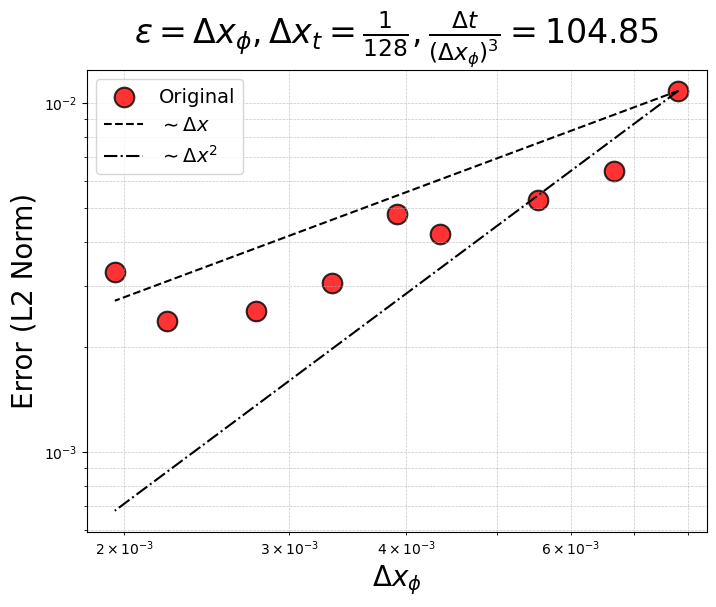

In [45]:
plt.figure(figsize=(8, 6))

L2_eps_dxphi_maxdt = [L2_eps_dxphi_Nx_128_maxdt, L2_eps_dxphi_Nx_150_maxdt, L2_eps_dxphi_Nx_181_maxdt, L2_eps_dxphi_Nx_230_maxdt, L2_eps_dxphi_Nx_256_maxdt , L2_eps_dxphi_Nx_300_maxdt, L2_eps_dxphi_Nx_362_maxdt, L2_eps_dxphi_Nx_450_maxdt, L2_eps_dxphi_Nx_512_maxdt]

xvalues = np.array([(1/128), (1/150), (1/181), (1/230), (1/256), (1/300), (1/362), (1/450), (1/512)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:],L2_eps_dxphi_maxdt[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \Delta x_{\phi}, \Delta x_t = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_\phi)^3} = 104.85 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_eps_dxphi_maxdt[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_eps_dxphi_maxdt[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Mean Error Graphs

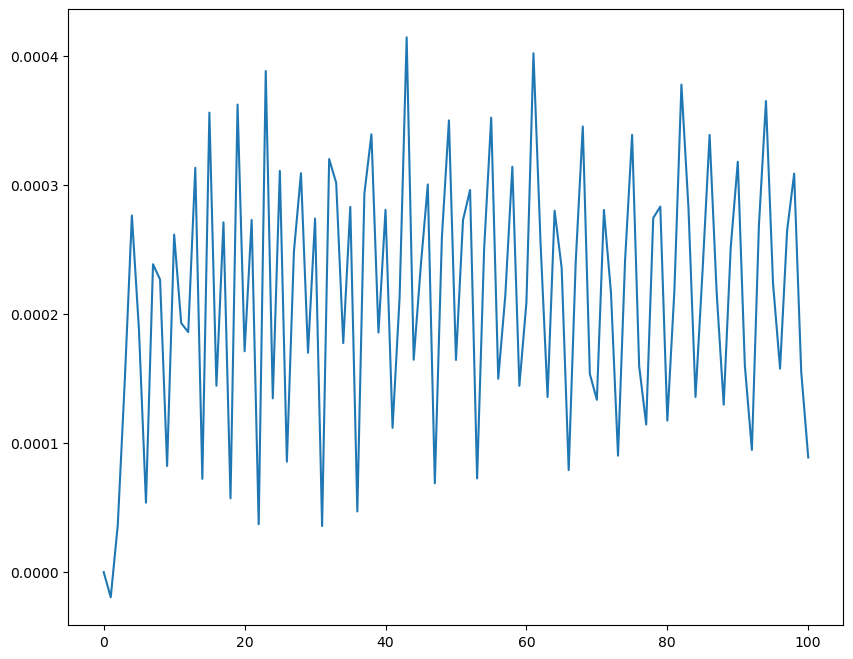

In [48]:
Error1 = h_a.flatten() - maxdt_eps_dxphi_Nx_450
plt.plot(Error1)

# As error seems to ossilate massively for these graphs, we can try calculating the mean eroor after 10 points

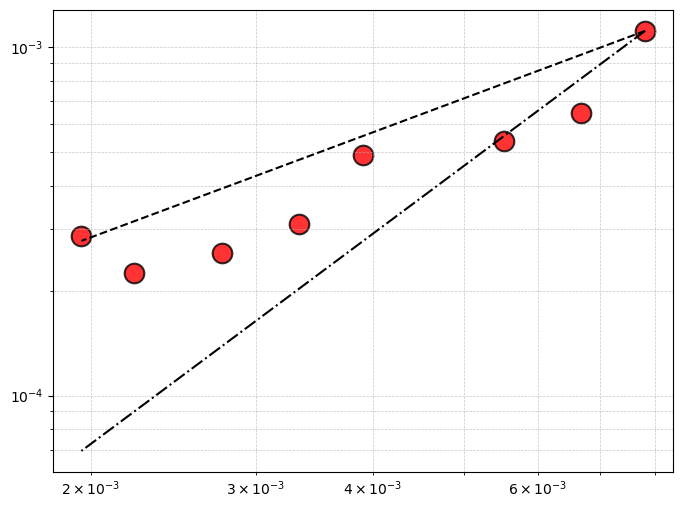

In [50]:
Error128 = h_a.flatten() - maxdt_eps_dxphi_Nx_128
Error256 = h_a.flatten() - maxdt_eps_dxphi_Nx_256
Error512 = h_a.flatten() - maxdt_eps_dxphi_Nx_512
Error150 = h_a.flatten() - maxdt_eps_dxphi_Nx_150
Error181 = h_a.flatten() - maxdt_eps_dxphi_Nx_181
Error300 = h_a.flatten() - maxdt_eps_dxphi_Nx_300
Error362 = h_a.flatten() - maxdt_eps_dxphi_Nx_362
Error450 = h_a.flatten() - maxdt_eps_dxphi_Nx_450

mean_error128 = np.mean(Error128[10:])
mean_error256 = np.mean(Error256[10:])
mean_error512 = np.mean(Error512[10:])
mean_error150 = np.mean(Error150[10:])
mean_error181 = np.mean(Error181[10:])
mean_error300 = np.mean(Error300[10:])
mean_error362 = np.mean(Error362[10:])
mean_error450 = np.mean(Error450[10:])

plt.figure(figsize=(8, 6))
mean_error = [mean_error128, mean_error150, mean_error181, mean_error256, mean_error300, mean_error362, mean_error450, mean_error512]
xvalues = np.array([(1/128), (1/150), (1/181),  (1/256), (1/300), (1/362), (1/450), (1/512)])
plt.scatter(xvalues[:],mean_error[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

C1 = mean_error[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = mean_error[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²
eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line
# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence


# Try Again Cubic Interpolation

In [53]:
cubic_eps_dxphi_Nx_128 = np.load('N128_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_181 = np.load('N181_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_256 = np.load('N256_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_362 = np.load('N362_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_512 = np.load('N512_eps_dxphi_cubic.npz')['h_num']

cubic_eps_dxphi_Nx_230 = np.load('N230_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_300 = np.load('N300_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_150 = np.load('N150_eps_dxphi_cubic.npz')['h_num']
cubic_eps_dxphi_Nx_450 = np.load('N450_eps_dxphi_cubic.npz')['h_num']

In [55]:
L2_eps_dxphi_Nx_128_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_128)
L2_eps_dxphi_Nx_181_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_181)
L2_eps_dxphi_Nx_256_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_256)
L2_eps_dxphi_Nx_362_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_362)
L2_eps_dxphi_Nx_512_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_512)

L2_eps_dxphi_Nx_230_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_230)
L2_eps_dxphi_Nx_300_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_300)
L2_eps_dxphi_Nx_150_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_150)
L2_eps_dxphi_Nx_450_cubic = np.linalg.norm(h_a.flatten() - cubic_eps_dxphi_Nx_450)

<Figure size 800x600 with 0 Axes>

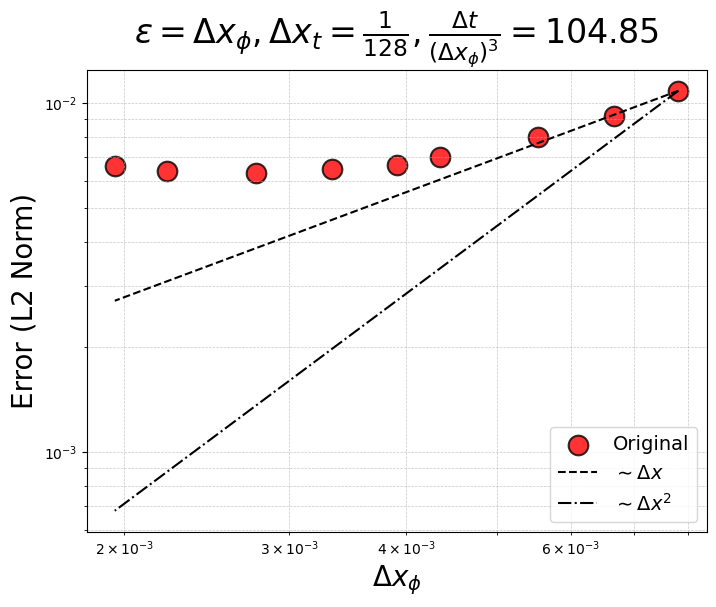

In [57]:
plt.figure(figsize=(8, 6))

L2_eps_dxphi_cubic = [L2_eps_dxphi_Nx_128_cubic, L2_eps_dxphi_Nx_150_cubic, L2_eps_dxphi_Nx_181_cubic, L2_eps_dxphi_Nx_230_cubic, L2_eps_dxphi_Nx_256_cubic , L2_eps_dxphi_Nx_300_cubic, L2_eps_dxphi_Nx_362_cubic, L2_eps_dxphi_Nx_450_cubic, L2_eps_dxphi_Nx_512_cubic]

xvalues = np.array([(1/128), (1/150), (1/181), (1/230), (1/256), (1/300), (1/362), (1/450), (1/512)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:],L2_eps_dxphi_cubic[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \Delta x_{\phi}, \Delta x_t = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_\phi)^3} = 104.85 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_eps_dxphi_cubic[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_eps_dxphi_cubic[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Changing dx_phi and dt ,let eps = 2*dx_phi, dx_T max value 

In [60]:
eps_2dxphi_Nx_128 = np.load('New_N128_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_181 = np.load('New_N181_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_256 = np.load('New_N256_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_362 = np.load('New_N362_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_512 = np.load('New_N512_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_724 = np.load('New_N724_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_1024 = np.load('New_N1024_eps_2dxphi.npz')['h_num']

eps_2dxphi_Nx_152 = np.load('New_N152_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_215 = np.load('New_N215_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_304 = np.load('New_N304_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_430 = np.load('New_N430_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_609 = np.load('New_N609_eps_2dxphi.npz')['h_num']
eps_2dxphi_Nx_861 = np.load('New_N861_eps_2dxphi.npz')['h_num']

In [62]:
L2_eps_2dxphi_Nx_128 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_128)
L2_eps_2dxphi_Nx_181 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_181)
L2_eps_2dxphi_Nx_256 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_256)
L2_eps_2dxphi_Nx_362 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_362)
L2_eps_2dxphi_Nx_512 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_512)
L2_eps_2dxphi_Nx_724 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_724)
L2_eps_2dxphi_Nx_1024 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_1024)

L2_eps_2dxphi_Nx_152 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_152)
L2_eps_2dxphi_Nx_215 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_215)
L2_eps_2dxphi_Nx_304 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_304)
L2_eps_2dxphi_Nx_430 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_430)
L2_eps_2dxphi_Nx_609 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_609)
L2_eps_2dxphi_Nx_861 = np.linalg.norm(h_a.flatten() - eps_2dxphi_Nx_861)

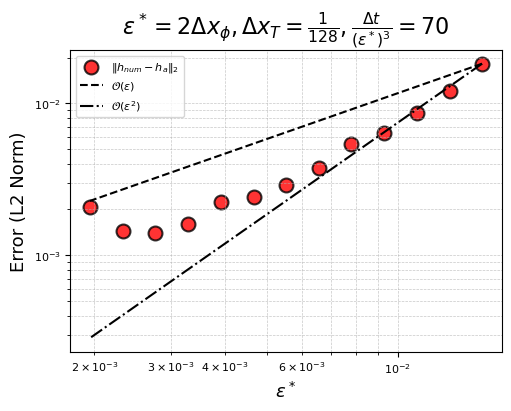

In [64]:
#plt.figure(figsize=(8, 6))
plt.figure(figsize=(5, 4), layout='constrained')

L2_eps_2dxphi = [L2_eps_2dxphi_Nx_128, L2_eps_2dxphi_Nx_152, L2_eps_2dxphi_Nx_181, L2_eps_2dxphi_Nx_215, L2_eps_2dxphi_Nx_256, \
                 L2_eps_2dxphi_Nx_304, L2_eps_2dxphi_Nx_362, L2_eps_2dxphi_Nx_430, L2_eps_2dxphi_Nx_512, L2_eps_2dxphi_Nx_609, \
                 L2_eps_2dxphi_Nx_724, L2_eps_2dxphi_Nx_861, L2_eps_2dxphi_Nx_1024]

xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512), (1/608), (1/724), (1/861), (1/1024)])
eps_values = 2*xvalues


plt.scatter(eps_values[:], L2_eps_2dxphi[:], s=100, color='red', label = r'$\| h_{num} - h_{a} \|_2$' , edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon^* = 2\Delta x_{\phi}, \Delta x_T = \frac{1}{128} , \frac{\Delta t}{(\epsilon^*)^3} = 70 $', fontsize=16)
plt.xlabel(r'$\epsilon^*$', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize = 13)

C1 = L2_eps_2dxphi[0] / eps_values[0]  # Scaling factor for ∼ ε
C2 = L2_eps_2dxphi[0] / (eps_values[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * eps_values    # ∼ ε reference line
eps_2 = C2 * eps_values**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(eps_values, eps_1, 'k--', label=r'$\mathcal{O}(\epsilon)$')   # First-order convergence
plt.loglog(eps_values, eps_2, 'k-.', label=r'$\mathcal{O}(\epsilon^2)$') # Second-order convergence

plt.legend(fontsize=8)

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

#plt.savefig("Multi_Res_e=2dx.pdf", format="pdf")

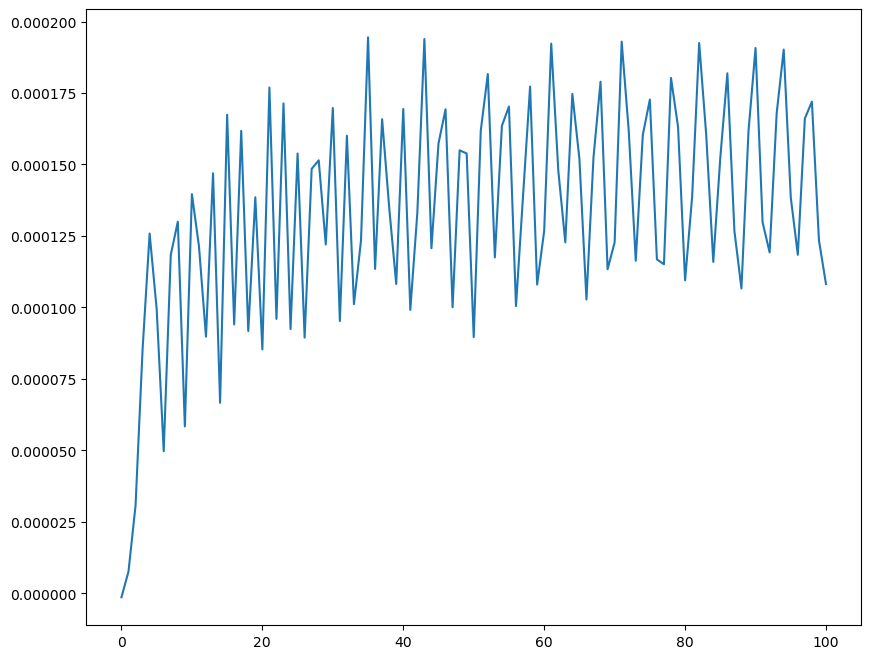

In [66]:
New_Error128 = h_a.flatten() - eps_2dxphi_Nx_128
New_Error256 = h_a.flatten() - eps_2dxphi_Nx_256
New_Error512 = h_a.flatten() - eps_2dxphi_Nx_512
New_Error362 = h_a.flatten() - eps_2dxphi_Nx_362
New_Error724 = h_a.flatten() - eps_2dxphi_Nx_724
plt.plot(New_Error724)

# For Thesis !!!!!!!!!!!!!!!

In [69]:
phimew_eps128_Nx_128 = np.load('phimewT_N128_eps128.npz')['h_num']
phimew_eps128_Nx_256 = np.load('phimewT_N256_eps128.npz')['h_num']
phimew_eps128_Nx_512 = np.load('phimewT_N512_eps128.npz')['h_num']
phimew_eps128_Nx_1024 = np.load('phimewT_N1024_eps128.npz')['h_num']

phimew_eps128_Nx_181 = np.load('phimewT_N181_eps128.npz')['h_num']
phimew_eps128_Nx_362 = np.load('phimewT_N362_eps128.npz')['h_num']
phimew_eps128_Nx_724 = np.load('phimewT_N724_eps128.npz')['h_num']

phimew_eps128_Nx_152 = np.load('phimewT_N152_eps128.npz')['h_num']
phimew_eps128_Nx_215 = np.load('phimewT_N215_eps128.npz')['h_num']
phimew_eps128_Nx_304 = np.load('phimewT_N304_eps128.npz')['h_num']
phimew_eps128_Nx_430 = np.load('phimewT_N430_eps128.npz')['h_num']
phimew_eps128_Nx_609 = np.load('phimewT_N609_eps128.npz')['h_num']
phimew_eps128_Nx_861 = np.load('phimewT_N861_eps128.npz')['h_num']

In [71]:
L2_phimew_Nx_128 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_128)
L2_phimew_Nx_256 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_256)
L2_phimew_Nx_512 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_512)
L2_phimew_Nx_1024 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_1024)

L2_phimew_Nx_181 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_181)
L2_phimew_Nx_362 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_362)
L2_phimew_Nx_724 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_724)

L2_phimew_Nx_152 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_152)
L2_phimew_Nx_215 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_215)
L2_phimew_Nx_304 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_304)
L2_phimew_Nx_430 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_430)
L2_phimew_Nx_609 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_609)
L2_phimew_Nx_861 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_861)

<Figure size 800x600 with 0 Axes>

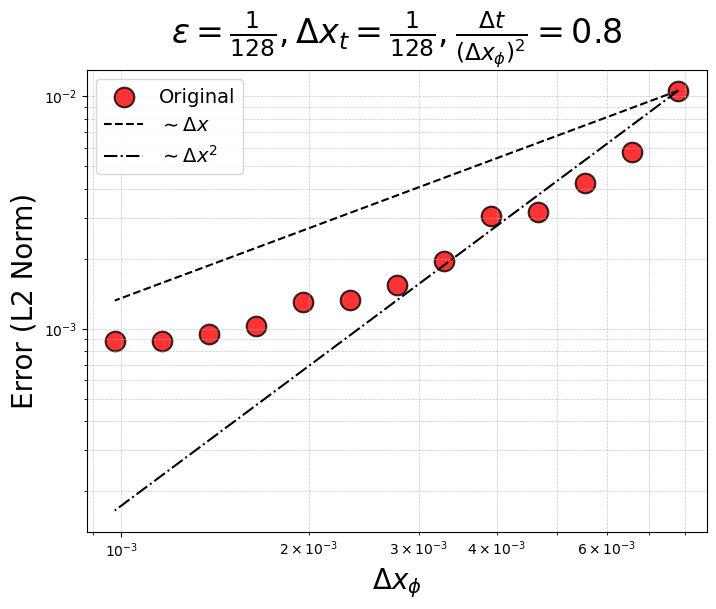

In [73]:
plt.figure(figsize=(8, 6))

L2_phimew = [L2_phimew_Nx_128 , L2_phimew_Nx_152, L2_phimew_Nx_181, L2_phimew_Nx_215, L2_phimew_Nx_256, L2_phimew_Nx_304, L2_phimew_Nx_362, \
             L2_phimew_Nx_430, L2_phimew_Nx_512, L2_phimew_Nx_609, L2_phimew_Nx_724, L2_phimew_Nx_861, L2_phimew_Nx_1024]

xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512), (1/609), (1/724), (1/861), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_phimew[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_t = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_phimew[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_phimew[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Slightly perturb dx x_t to Verify

In [76]:
phimew_eps128_Nx_128 = np.load('phimewT_N128_eps128.npz')['h_num']
phimew_eps128_Nx_256 = np.load('Verify_phimewT_N256_eps128.npz')['h_num']
phimew_eps128_Nx_512 = np.load('Verify_phimewT_N512_eps128.npz')['h_num']
phimew_eps128_Nx_1024 = np.load('Verify_phimewT_N1024_eps128.npz')['h_num']

phimew_eps128_Nx_181 = np.load('Verify_phimewT_N181_eps128.npz')['h_num']
phimew_eps128_Nx_362 = np.load('Verify_phimewT_N362_eps128.npz')['h_num']
phimew_eps128_Nx_724 = np.load('phimewT_N724_eps128.npz')['h_num']

phimew_eps128_Nx_152 = np.load('Verify_phimewT_N152_eps128.npz')['h_num']
phimew_eps128_Nx_215 = np.load('Verify_phimewT_N215_eps128.npz')['h_num']
phimew_eps128_Nx_304 = np.load('Verify_phimewT_N304_eps128.npz')['h_num']
phimew_eps128_Nx_430 = np.load('Verify_phimewT_N430_eps128.npz')['h_num']
phimew_eps128_Nx_608 = np.load('Verify_phimewT_N608_eps128.npz')['h_num']
phimew_eps128_Nx_861 = np.load('Verify_phimewT_N861_eps128.npz')['h_num']

In [78]:
L2_phimew_Nx_128 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_128)
L2_phimew_Nx_256 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_256)
L2_phimew_Nx_512 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_512)
L2_phimew_Nx_1024 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_1024)

L2_phimew_Nx_181 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_181)
L2_phimew_Nx_362 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_362)
L2_phimew_Nx_724 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_724)

L2_phimew_Nx_152 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_152)
L2_phimew_Nx_215 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_215)
L2_phimew_Nx_304 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_304)
L2_phimew_Nx_430 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_430)
L2_phimew_Nx_609 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_609)
L2_phimew_Nx_861 = np.linalg.norm(h_a.flatten() - phimew_eps128_Nx_861)

<Figure size 800x600 with 0 Axes>

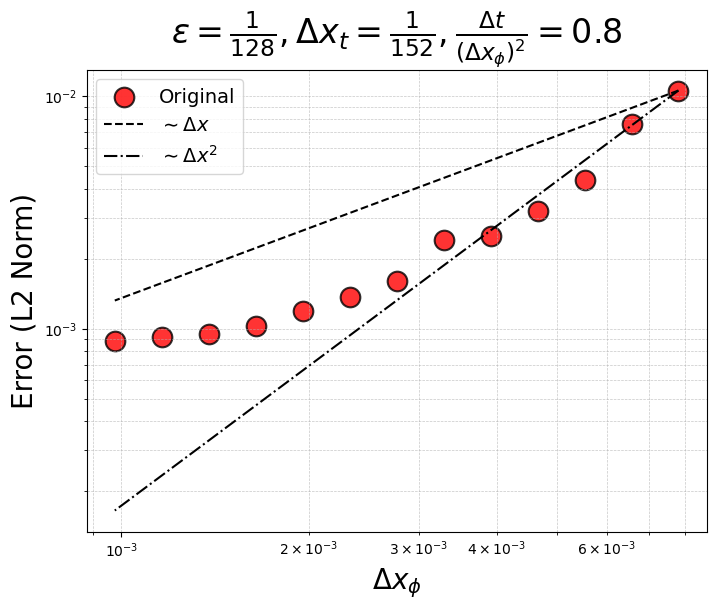

In [80]:
plt.figure(figsize=(8, 6))

L2_phimew = [L2_phimew_Nx_128, L2_phimew_Nx_152, L2_phimew_Nx_181, L2_phimew_Nx_215, L2_phimew_Nx_256, L2_phimew_Nx_304, L2_phimew_Nx_362, \
             L2_phimew_Nx_430, L2_phimew_Nx_512, L2_phimew_Nx_609, L2_phimew_Nx_724, L2_phimew_Nx_861, L2_phimew_Nx_1024]

xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512), (1/609), (1/724), (1/861), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_phimew[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_t = \frac{1}{152} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_phimew[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_phimew[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Check Error over time for graph above!!!!!!!!!

In [83]:
Error128 = np.abs(h_a.flatten() - phimew_eps128_Nx_128)
Error181 = np.abs(h_a.flatten() - phimew_eps128_Nx_181)
Error256 = np.abs(h_a.flatten() - phimew_eps128_Nx_256)
Error362 = np.abs(h_a.flatten() - phimew_eps128_Nx_362)
Error512 = np.abs(h_a.flatten() - phimew_eps128_Nx_512)
Error724 = np.abs(h_a.flatten() - phimew_eps128_Nx_724)
Error1024 = np.abs(h_a.flatten() - phimew_eps128_Nx_1024)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77419/633289737.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=24)


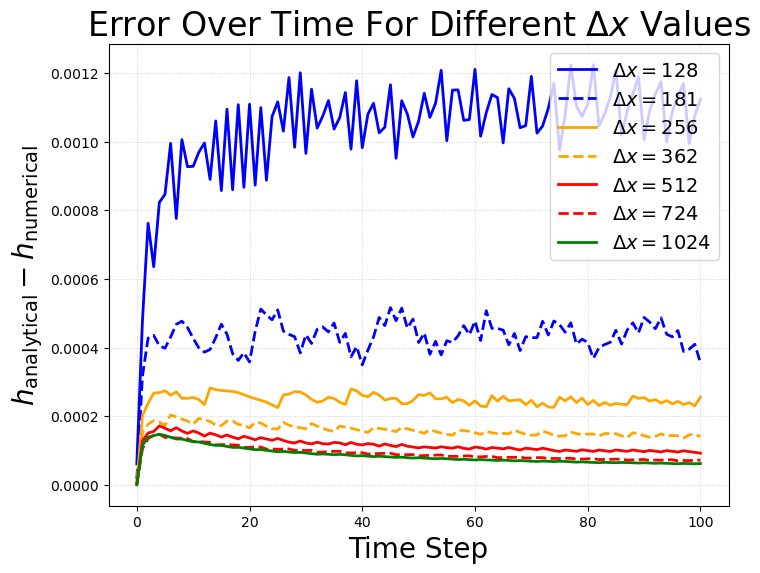

In [85]:
plt.figure(figsize=(8, 6))

plt.plot(Error128, 'blue', linewidth=2, label=r'$\Delta x = 128 $')
plt.plot(Error181, 'blue', linestyle='dashed', linewidth=2, label=r'$\Delta x = 181$')
plt.plot(Error256, 'orange', linewidth=2, label=r'$\Delta x = 256$')
plt.plot(Error362, 'orange',linestyle='dashed', linewidth=2, label=r'$\Delta x = 362$')
plt.plot(Error512, 'red', linewidth=2, label=r'$\Delta x = 512$')
plt.plot(Error724, 'red', linestyle='dashed', linewidth=2, label=r'$\Delta x = 724$')
plt.plot(Error1024, 'green',  linewidth=2, label=r'$\Delta x = 1024$')

# Labels and Title
plt.xlabel("Time Step", fontsize=20)
plt.ylabel(r"$h_{\text{analytical}} - h_{\text{numerical}}$", fontsize=20)
plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=24)

# Grid and Legend
plt.grid(True, linestyle=":", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=14, loc='upper right')


#plt.savefig("Asmytotic_Error_Over_time.png", format="png")

# Perturb dxT a small bit

In [88]:
#NT181_eps128_Nx_181 = np.load('NT181_Nphi181_eps128.npz')['h_num']
NT256_eps128_Nx_256 = np.load('NT256_Nphi256_eps128.npz')['h_num']
NT256_eps128_Nx_362 = np.load('NT256_Nphi362_eps128.npz')['h_num']
NT256_eps128_Nx_512 = np.load('NT256_Nphi512_eps128.npz')['h_num']
NT256_eps128_Nx_724 = np.load('NT256_Nphi724_eps128.npz')['h_num']
NT256_eps128_Nx_1024 = np.load('NT256_Nphi1024_eps128.npz')['h_num']

In [90]:
#L2_NT256_Nx_181 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_181)
L2_NT256_Nx_256 = np.linalg.norm(h_a.flatten() - NT256_eps128_Nx_256)
L2_NT256_Nx_362 = np.linalg.norm(h_a.flatten() - NT256_eps128_Nx_362)
L2_NT256_Nx_512 = np.linalg.norm(h_a.flatten() - NT256_eps128_Nx_512)
L2_NT256_Nx_724 = np.linalg.norm(h_a.flatten() - NT256_eps128_Nx_724)
L2_NT256_Nx_1024 = np.linalg.norm(h_a.flatten() - NT256_eps128_Nx_1024)

<Figure size 800x600 with 0 Axes>

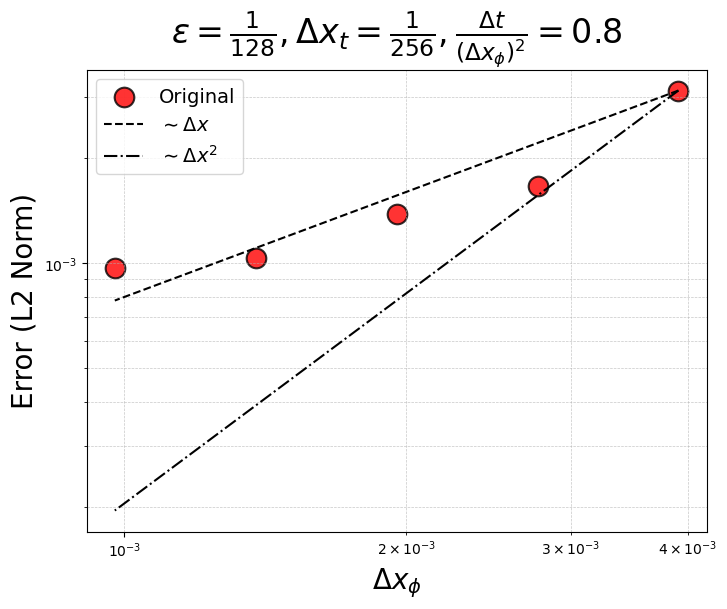

In [92]:
plt.figure(figsize=(8, 6))

L2_NT181 = [L2_NT256_Nx_256, L2_NT256_Nx_362, L2_NT256_Nx_512, L2_NT256_Nx_724, L2_NT256_Nx_1024]

xvalues = np.array([(1/256), (1/362),  (1/512), (1/724), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_NT181[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_t = \frac{1}{256} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_NT181[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_NT181[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

In [94]:
NT181_eps128_Nx_181 = np.load('NT181_Nphi181_eps128.npz')['h_num']
NT181_eps128_Nx_256 = np.load('NT256_Nphi256_eps128.npz')['h_num']
NT181_eps128_Nx_362 = np.load('NT256_Nphi362_eps128.npz')['h_num']
NT181_eps128_Nx_512 = np.load('NT256_Nphi512_eps128.npz')['h_num']
NT181_eps128_Nx_724 = np.load('NT256_Nphi724_eps128.npz')['h_num']
NT181_eps128_Nx_1024 = np.load('NT256_Nphi1024_eps128.npz')['h_num']

In [96]:
L2_NT181_Nx_181 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_181)
L2_NT181_Nx_256 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_256)
L2_NT181_Nx_362 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_362)
L2_NT181_Nx_512 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_512)
L2_NT181_Nx_724 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_724)
L2_NT181_Nx_1024 = np.linalg.norm(h_a.flatten() - NT181_eps128_Nx_1024)

<Figure size 800x600 with 0 Axes>

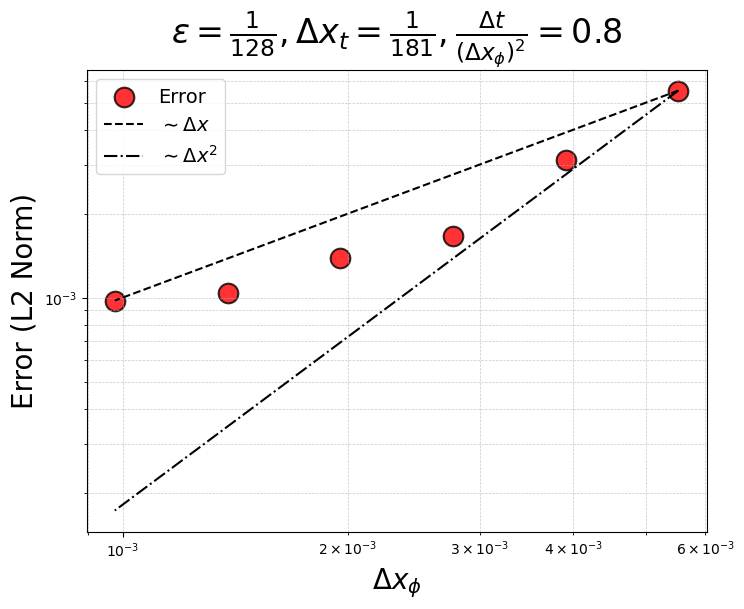

In [98]:
plt.figure(figsize=(8, 6))

L2_NT181 = [L2_NT181_Nx_181, L2_NT181_Nx_256, L2_NT181_Nx_362, L2_NT181_Nx_512, L2_NT181_Nx_724, L2_NT181_Nx_1024]

xvalues = np.array([(1/181), (1/256), (1/362),  (1/512), (1/724), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_NT181[:], s=200, color='red', label = 'Error', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_t = \frac{1}{181} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_NT181[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_NT181[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)

# Cubic Hermite Splines

In [101]:
CubicSplines_eps128_Nx_128 = np.load('CubicSplines_Nphi_128_eps128.npz')['h_num']
CubicSplines_eps128_Nx_256 = np.load('CubicSplines_Nphi_256_eps128.npz')['h_num']
CubicSplines_eps128_Nx_512 = np.load('CubicSplines_Nphi_512_eps128.npz')['h_num']
CubicSplines_eps128_Nx_1024 = np.load('CubicSplines_Nphi_1024_eps128.npz')['h_num']

CubicSplines_eps128_Nx_181 = np.load('CubicSplines_Nphi_181_eps128.npz')['h_num']
CubicSplines_eps128_Nx_362 = np.load('CubicSplines_Nphi_362_eps128.npz')['h_num']
CubicSplines_eps128_Nx_724 = np.load('CubicSplines_Nphi_724_eps128.npz')['h_num']

CubicSplines_eps128_Nx_152 = np.load('CubicSplines_Nphi_152_eps128.npz')['h_num']
CubicSplines_eps128_Nx_215 = np.load('CubicSplines_Nphi_215_eps128.npz')['h_num']
CubicSplines_eps128_Nx_304 = np.load('CubicSplines_Nphi_304_eps128.npz')['h_num']
CubicSplines_eps128_Nx_430 = np.load('CubicSplines_Nphi_430_eps128.npz')['h_num']
CubicSplines_eps128_Nx_609 = np.load('CubicSplines_Nphi_609_eps128.npz')['h_num']
CubicSplines_eps128_Nx_861 = np.load('CubicSplines_Nphi_861_eps128.npz')['h_num']

In [103]:
L2_CubicSplines_Nx_128 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_128)
L2_CubicSplines_Nx_256 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_256)
L2_CubicSplines_Nx_512 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_512)
L2_CubicSplines_Nx_1024 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_1024)

L2_CubicSplines_Nx_181 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_181)
L2_CubicSplines_Nx_362 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_362)
L2_CubicSplines_Nx_724 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_724)

L2_CubicSplines_Nx_152 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_152)
L2_CubicSplines_Nx_215 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_215)
L2_CubicSplines_Nx_304 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_304)
L2_CubicSplines_Nx_430 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_430)
L2_CubicSplines_Nx_609 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_609)
L2_CubicSplines_Nx_861 = np.linalg.norm(h_a.flatten() - CubicSplines_eps128_Nx_861)

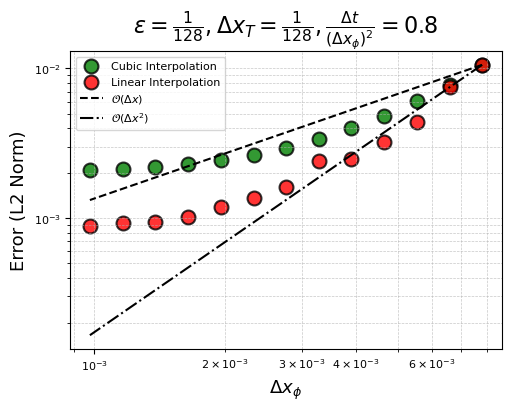

In [105]:
plt.figure(figsize=(5, 4), layout='constrained')

L2_CubicSplines =  [L2_CubicSplines_Nx_128, L2_CubicSplines_Nx_152, L2_CubicSplines_Nx_181, L2_CubicSplines_Nx_215, L2_CubicSplines_Nx_256, \
                   L2_CubicSplines_Nx_304, L2_CubicSplines_Nx_362, L2_CubicSplines_Nx_430, L2_CubicSplines_Nx_512, L2_CubicSplines_Nx_609, \
                   L2_CubicSplines_Nx_724, L2_CubicSplines_Nx_861, L2_CubicSplines_Nx_1024]

xvalues = np.array([(1/128), (1/152), (1/181), (1/215), (1/256), (1/304), (1/362), (1/430), (1/512), (1/609), (1/724), (1/861), (1/1024)])

plt.scatter(xvalues[:], L2_CubicSplines[:], s=100, color='green', label = 'Cubic Interpolation', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.scatter(xvalues[:], L2_phimew[:], s=100, color='red', label = 'Linear Interpolation', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_T = \frac{1}{128} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=16)
plt.xlabel(r'$\Delta x_\phi$', fontsize=13)
plt.ylabel('Error (L2 Norm)', fontsize =13)

C1 = L2_CubicSplines[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_CubicSplines[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\mathcal{O}(\Delta x)$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\mathcal{O}(\Delta x^2)$') # Second-order convergence

plt.tick_params(axis='both', which='major', labelsize=8)
plt.tick_params(axis='both', which='minor', labelsize=8)

plt.legend(fontsize=8)
#plt.savefig("MRes_Comparison.pdf", format="pdf")

# Verify Cubic (Error over time)

In [108]:
Error128 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_128)
Error181 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_181)
Error256 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_256)
Error362 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_362)
Error512 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_512)
Error724 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_724)
Error1024 = np.abs(h_a.flatten() - CubicSplines_eps128_Nx_1024)

<>:14: SyntaxWarning: invalid escape sequence '\D'
<>:14: SyntaxWarning: invalid escape sequence '\D'
/var/folders/9h/nmgxk6252393vjm65h0cjxxr0000gn/T/ipykernel_77419/4223373964.py:14: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=24)


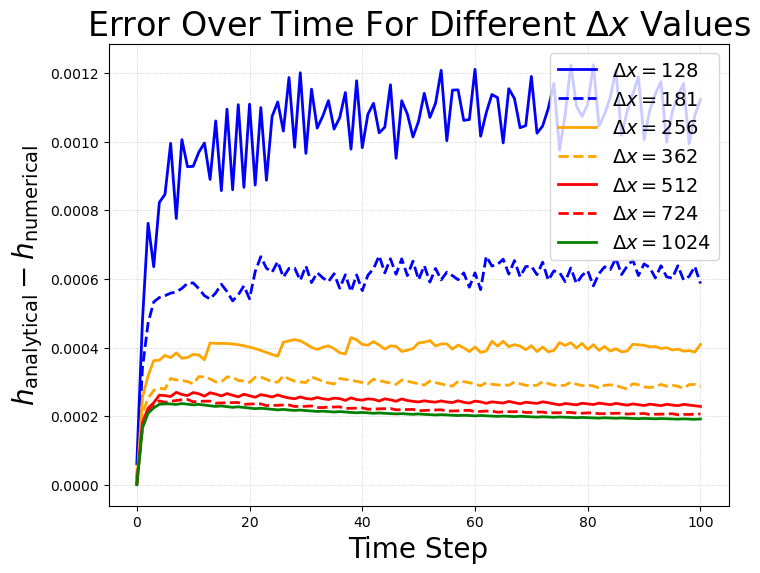

In [110]:
plt.figure(figsize=(8, 6))

plt.plot(Error128, 'blue', linewidth=2, label=r'$\Delta x = 128 $')
plt.plot(Error181, 'blue', linestyle='dashed', linewidth=2, label=r'$\Delta x = 181$')
plt.plot(Error256, 'orange', linewidth=2, label=r'$\Delta x = 256$')
plt.plot(Error362, 'orange',linestyle='dashed', linewidth=2, label=r'$\Delta x = 362$')
plt.plot(Error512, 'red', linewidth=2, label=r'$\Delta x = 512$')
plt.plot(Error724, 'red', linestyle='dashed', linewidth=2, label=r'$\Delta x = 724$')
plt.plot(Error1024, 'green',  linewidth=2, label=r'$\Delta x = 1024$')

# Labels and Title
plt.xlabel("Time Step", fontsize=20)
plt.ylabel(r"$h_{\text{analytical}} - h_{\text{numerical}}$", fontsize=20)
plt.title("Error Over Time For Different $\Delta x$ Values", fontsize=24)

# Grid and Legend
plt.grid(True, linestyle=":", linewidth=0.6, alpha=0.7)
plt.legend(fontsize=14, loc='upper right')


#plt.savefig("Asmytotic_Error_Over_time.png", format="png")


# Perturb dxT

In [113]:
CubicSplines181_eps128_Nx_256 = np.load('CubicSplines181_Nphi_256_eps128.npz')['h_num']
CubicSplines181_eps128_Nx_512 = np.load('CubicSplines181_Nphi_512_eps128.npz')['h_num']
CubicSplines181_eps128_Nx_1024 = np.load('CubicSplines181_Nphi_1024_eps128.npz')['h_num']

CubicSplines181_eps128_Nx_181 = np.load('CubicSplines181_Nphi_181_eps128.npz')['h_num']
CubicSplines181_eps128_Nx_362 = np.load('CubicSplines181_Nphi_362_eps128.npz')['h_num']
CubicSplines181_eps128_Nx_724 = np.load('CubicSplines181_Nphi_724_eps128.npz')['h_num']

In [115]:
L2_CubicSplines181_Nx_256 = np.linalg.norm(h_a.flatten() - CubicSplines181_eps128_Nx_256)
L2_CubicSplines181_Nx_512 = np.linalg.norm(h_a.flatten() - CubicSplines181_eps128_Nx_512)
L2_CubicSplines181_Nx_1024 = np.linalg.norm(h_a.flatten() - CubicSplines181_eps128_Nx_1024)

L2_CubicSplines181_Nx_181 = np.linalg.norm(h_a.flatten() - CubicSplines181_eps128_Nx_181)
L2_CubicSplines181_Nx_362 = np.linalg.norm(h_a.flatten() - CubicSplines181_eps128_Nx_362)
L2_CubicSplines181_Nx_724 = np.linalg.norm(h_a.flatten() - CubicSplines181_eps128_Nx_724)

<Figure size 800x600 with 0 Axes>

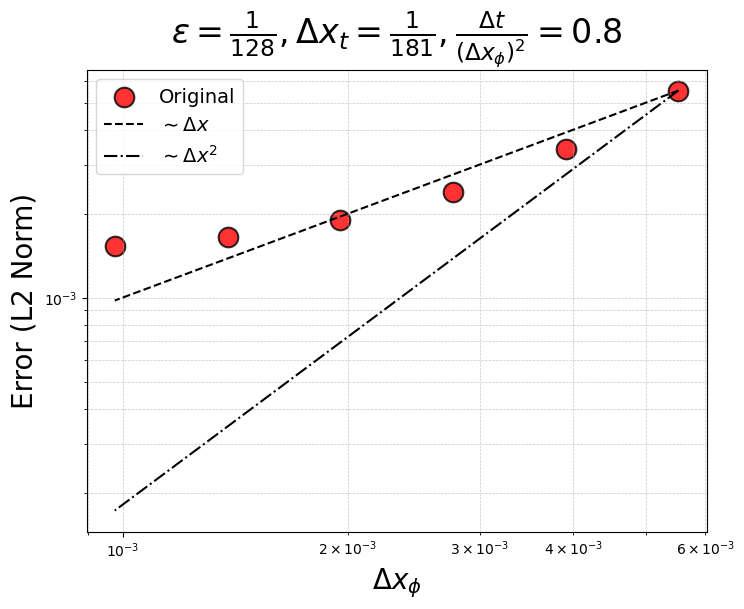

In [117]:
plt.figure(figsize=(8, 6))

L2_CubicSplines181 = [L2_CubicSplines181_Nx_181, L2_CubicSplines181_Nx_256, L2_CubicSplines181_Nx_362, L2_CubicSplines181_Nx_512, L2_CubicSplines181_Nx_724, L2_CubicSplines181_Nx_1024]

xvalues = np.array([(1/181), (1/256), (1/362),  (1/512), (1/724), (1/1024)])
plt.figure(figsize=(8, 6))
plt.scatter(xvalues[:], L2_CubicSplines181[:], s=200, color='red', label = 'Original', edgecolors='black', linewidth=1.5, alpha=0.8)
plt.loglog()
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.title(r'$\epsilon = \frac{1}{128}, \Delta x_t = \frac{1}{181} ,  \frac{\Delta t}{(\Delta x_\phi)^2} = 0.8 $', fontsize=24)
plt.xlabel(r'$\Delta x_\phi$', fontsize=20)
plt.ylabel('Error (L2 Norm)', fontsize = 20)

C1 = L2_CubicSplines181[0] / xvalues[0]  # Scaling factor for ∼ ε
C2 = L2_CubicSplines181[0] / (xvalues[0]**2)  # Scaling factor for ∼ ε²

eps_1 = C1 * xvalues    # ∼ ε reference line
eps_2 = C2 * xvalues**2  # ∼ ε² reference line

# Plot reference lines
plt.loglog(xvalues, eps_1, 'k--', label=r'$\sim \Delta x$')   # First-order convergence
plt.loglog(xvalues, eps_2, 'k-.', label=r'$\sim \Delta x^2$') # Second-order convergence

plt.legend(fontsize=14)